# Constrained K-Means SigClust

We investigate the Constrained K-Means algorithm, and try a version of SigClust using it.

In [1]:
import sigclust

import numpy as np
np.random.seed(824)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd



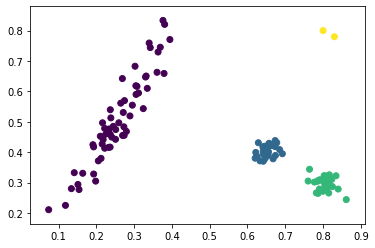

In [2]:
toy = pd.read_csv('examples/sigclust_toy_data.csv', header=None)

toy = toy.T
toy.columns = ['label', 'x1', 'x2']

plt.scatter(toy['x1'], toy['x2'], c=toy['label'])



In [3]:
longcluster_and_outliers = toy[toy['label'].isin((1,4))]

## Constrained 2-Means clustering did NOT find the right labels!

In [22]:
c_kmeans = sigclust.ConstrainedKMeans()
c_kmeans.fit(longcluster_and_outliers[['x1', 'x2']], (2,60))

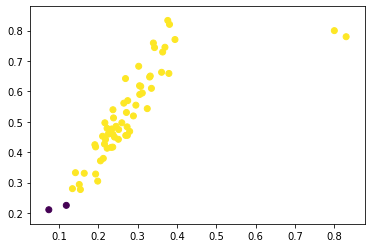

In [23]:
plt.scatter(longcluster_and_outliers['x1'], longcluster_and_outliers['x2'], c=c_kmeans.labels)

## But another random start does!

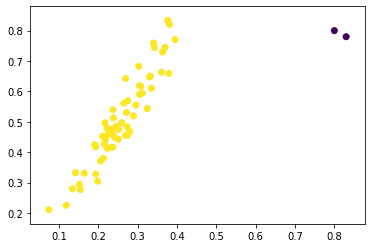

In [19]:
plt.scatter(longcluster_and_outliers['x1'], longcluster_and_outliers['x2'], c=c_kmeans.labels)

## Sample CI versus simulated CIs (using constrained 2-means)

In [6]:
csc = sigclust.ConstrainedKMeansSigClust(num_simulations=200)
csc.fit(longcluster_and_outliers[['x1','x2']], longcluster_and_outliers['label'])

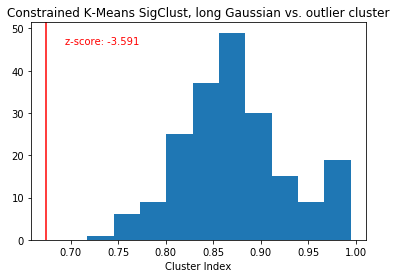

In [24]:
sample_ci = sigclust.compute_cluster_index(longcluster_and_outliers[['x1', 'x2']], longcluster_and_outliers['label'])
plt.hist(csc.simulated_cluster_indices)
plt.axvline(sample_ci, color='red')
plt.title("Constrained K-Means SigClust, long Gaussian vs. outlier cluster")
plt.xlabel("Cluster Index")
plt.text(.1, .9, "z-score: {:.3f}".format(csc.z_score), color='red', transform=plt.gca().transAxes)
plt.show()



So, the constrained k-means approach does reject in this case, as desired. 